In [1]:
from spatial_analysis import get_clusters_swiss
from forecast import train_eval_metrics, train_forecast 

### Computing the clusters:

This is the clusters used to train the ngboost models. 

In [2]:
clusters = get_clusters_swiss(t=0.6, end_date = '2022-04-30', plot = False)

clusters

[array(['AG', 'AI', 'AR', 'BE', 'BL', 'BS', 'GL', 'GR', 'LU', 'NW', 'OW',
        'SG', 'SH', 'SO', 'SZ', 'TG', 'UR', 'ZG', 'ZH'], dtype=object),
 array(['FR', 'GE', 'JU', 'NE', 'TI', 'VD', 'VS'], dtype=object)]

## Train and eval (ratio = 0.75) 

### Hospitalizations

#### Geneva


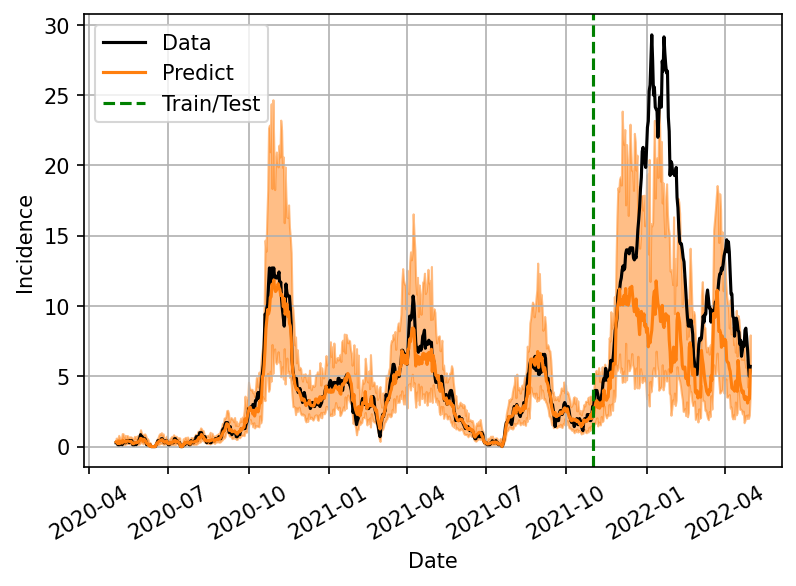

CPU times: user 1min 9s, sys: 420 ms, total: 1min 10s
Wall time: 1min 9s


,target,lower,median,upper,train_size,canton
date,,,,,,
2020-05-02,0.285714,0.186643,0.336967,0.608364,547,GE
2020-05-03,0.285714,0.145478,0.294744,0.597163,547,GE
2020-05-04,0.142857,0.089866,0.217943,0.528557,547,GE
2020-05-05,0.142857,0.201888,0.404250,0.809447,547,GE
2020-05-06,0.142857,0.086998,0.215371,0.533171,547,GE


In [3]:
%%time
df_eval_ge, df_m_ge = train_eval_metrics(canton = 'GE')

df_eval_ge.head()

### Berna 

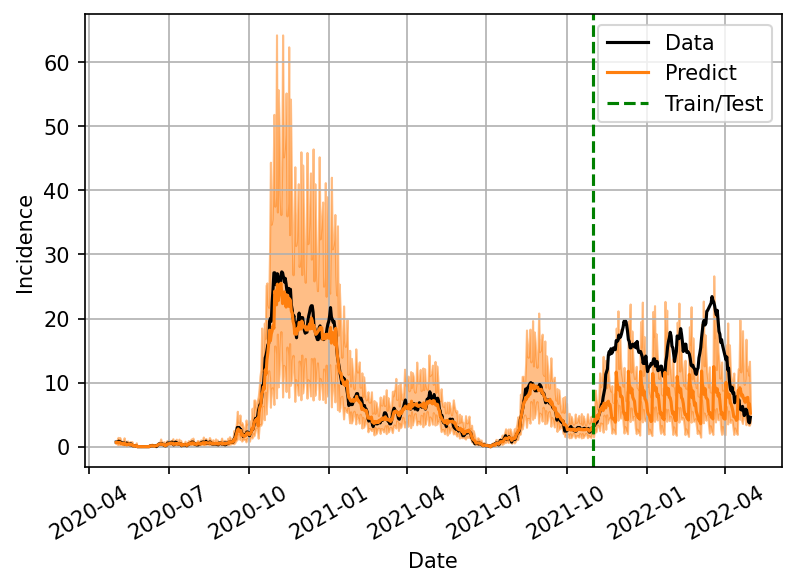

,target,lower,median,upper,train_size,canton
date,,,,,,
2020-05-02,0.714286,0.469800,0.658687,0.923518,547,BE
2020-05-03,0.714286,0.457841,0.694462,1.053375,547,BE
2020-05-04,0.714286,0.261290,0.617011,1.457011,547,BE
2020-05-05,0.857143,0.438830,0.683931,1.065931,547,BE
2020-05-06,0.714286,0.299804,0.658255,1.445274,547,BE


In [4]:
df_eval_be, df_m_be = train_eval_metrics(canton = 'BE')
df_eval_be.head()

In [5]:
df_m_be.head()

,in_sample,out_sample
metrics,,
explained_variance_score,0.982952,-0.009338
mean_absolute_error,0.463783,7.120817
mean_squared_error,0.880838,68.566280
root_mean_squared_error,0.938529,8.280476
mean_squared_log_error,0.006033,0.541601


#### Zurich 

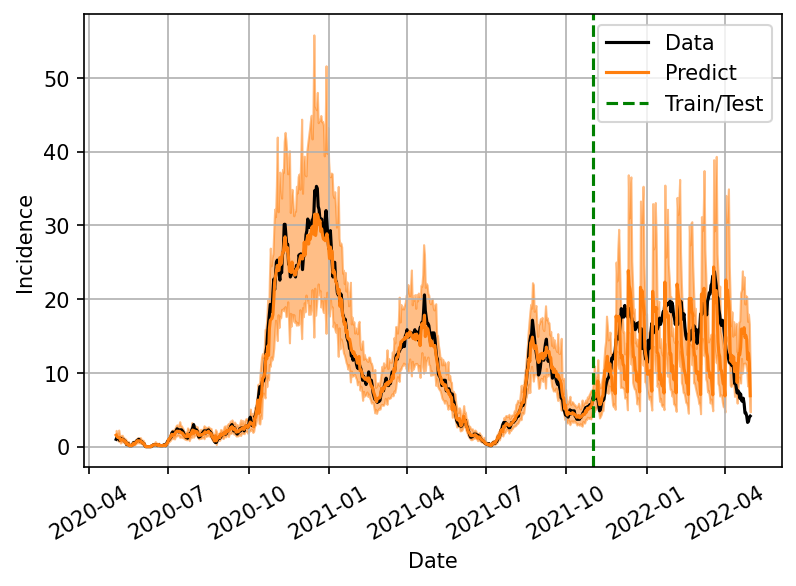

,target,lower,median,upper,train_size,canton
date,,,,,,
2020-05-02,1.000000,1.102729,1.563697,2.217362,547,ZH
2020-05-03,1.285714,0.996100,1.386938,1.931128,547,ZH
2020-05-04,1.142857,0.842537,1.242647,1.832765,547,ZH
2020-05-05,1.142857,0.724160,1.280609,2.264636,547,ZH
2020-05-06,0.857143,0.842306,1.179069,1.650473,547,ZH


In [6]:
df_eval_zh, df_m_zh = train_eval_metrics(canton = 'ZH')

df_eval_zh.head()

In [7]:
df_m_zh.head()

,in_sample,out_sample
metrics,,
explained_variance_score,0.990248,-0.364972
mean_absolute_error,0.518553,4.900428
mean_squared_error,0.808159,34.692320
root_mean_squared_error,0.898977,5.890019
mean_squared_log_error,0.006003,0.199461


## Train with all data available and forecast 

### Hospitalizations

#### Geneva 

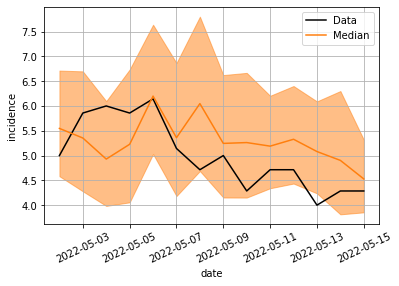

,lower,median,upper
date,,,
2022-05-02,4.583696,5.547391,6.713698
2022-05-03,4.279668,5.353881,6.697724
2022-05-04,3.984621,4.928964,6.097112
2022-05-05,4.056967,5.227252,6.735122
2022-05-06,5.030851,6.198752,7.637779


In [8]:
df_f_ge, df_f_m_ge = train_forecast(target_curve_name = 'hosp', canton = 'GE')

df_f_ge.head()

In [9]:
df_f_m_ge.head(6)

,forecast_error
metrics,
mean_absolute_error,0.614946
mean_squared_error,0.510620
root_mean_squared_error,0.714576
mean_squared_log_error,0.013941
mean_absolute_percentage_error,0.128165


#### Berna 

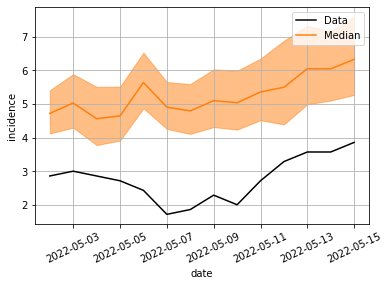

,lower,median,upper
date,,,
2022-05-02,4.123877,4.722218,5.407374
2022-05-03,4.295285,5.029846,5.890028
2022-05-04,3.777987,4.562356,5.509572
2022-05-05,3.911816,4.645864,5.517655
2022-05-06,4.873843,5.640456,6.527651


In [10]:
df_f_be, df_f_m_be = train_forecast(target_curve_name = 'hosp', canton = 'BE')

df_f_be.head()

In [11]:
df_f_m_be.head(6)

,forecast_error
metrics,
mean_absolute_error,2.500988
mean_squared_error,6.487104
root_mean_squared_error,2.546979
mean_squared_log_error,0.289591
mean_absolute_percentage_error,0.987998


#### Zurich

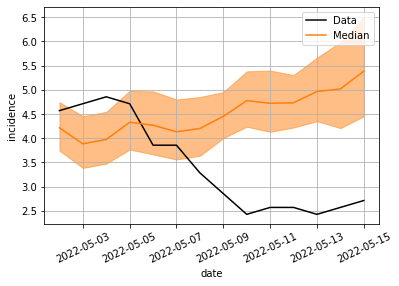

,lower,median,upper
date,,,
2022-05-02,3.745360,4.216157,4.746135
2022-05-03,3.387462,3.885634,4.457069
2022-05-04,3.477007,3.976154,4.546957
2022-05-05,3.767496,4.330715,4.978131
2022-05-06,3.667131,4.268952,4.969539


In [12]:
df_f_zh, df_f_m_zh = train_forecast(target_curve_name = 'hosp', canton = 'ZH')

df_f_zh.head()

In [13]:
df_f_m_zh.head(6)

,forecast_error
metrics,
mean_absolute_error,1.426623
mean_squared_error,2.840762
root_mean_squared_error,1.685456
mean_squared_log_error,0.129969
mean_absolute_percentage_error,0.511381


Creating the Figure 9 of the article (putting all the resuls in the same plot):

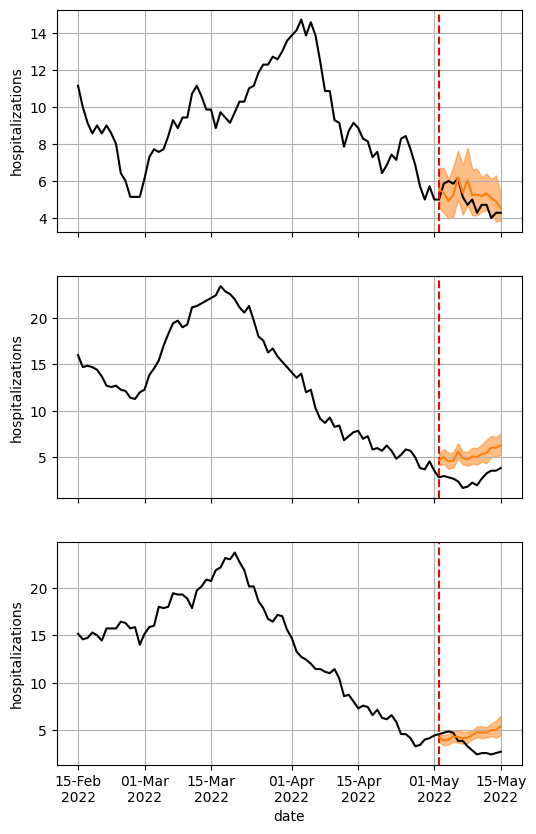

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

fig, (ax1,ax2,ax3) = plt.subplots(3,1, sharex = True, figsize = (6,10), dpi = 100)

canton = 'GE'

curves = {'hosp': 'hosp', 'icu_patients': 'hospcapacity', 
              'total_hosp': 'hospcapacity'}

cantons = {'GE': df_f_ge , 'BE': df_f_be, 'ZH': df_f_zh}

axes = [ax1, ax2, ax3]

for (i,j) in zip(cantons.keys(), axes):
    canton = i
    ydata = pd.read_csv(f'data_article/data_{canton}.csv')
    ydata.set_index("datum", inplace = True)
    ydata = ydata.sort_index()
    ydata.index = pd.to_datetime(ydata.index)

    j.plot(ydata[f'hosp_{canton}'][:cantons[canton].index[-1]][-90:], color = 'black', label = f'Data - {canton}')
    
    j.axvline(cantons[canton].index[0], color = 'red', ls = '--', label = 'Train/forecast')

    j.fill_between(cantons[canton].index,cantons[canton].upper, cantons[canton].lower, color = 'tab:orange', alpha = 0.5)

    j.plot(cantons[canton]['median'], label = f'Forecast - {canton}', color = 'tab:orange')

    j.grid()
    #j.legend()
    
    #j.set_ylabel(f'Hospitalizations in {canton}')
    j.set_ylabel(f'hospitalizations')
    

date_form = DateFormatter("%d-%b\n%Y")
ax3.xaxis.set_major_formatter(date_form)


#ax1.set_title('Forecast of New Hospitalizations')

plt.xlabel('date')
#plt.xticks(rotation = 25)
plt.savefig(f'plots/forecast_ge_be_zh.png', bbox_inches = 'tight', dpi = 300)
plt.show()